**Importing the libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install marketing_attribution_models
from marketing_attribution_models import MAM

**Import the data**

In [49]:
data_set = pd.read_csv("attribution data.csv")
data_set.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


**Which are the marketing channels?**

In [50]:
data_set.channel.unique()

array(['Instagram', 'Online Display', 'Paid Search', 'Facebook',
       'Online Video'], dtype=object)

**Creating a class MAM which takes care of the data conversion to fit into the models**

In [51]:

attributions = MAM(data_set,
    group_channels=True,
    channels_colname = 'channel',
    journey_with_conv_colname= 'conversion',
    group_channels_by_id_list=['cookie'],
    group_timestamp_colname = 'time',
    create_journey_id_based_on_conversion = True)




**Markov model**

In [52]:
attribution_markov = attributions.attribution_markov(transition_to_same_state=False)

<Axes: >

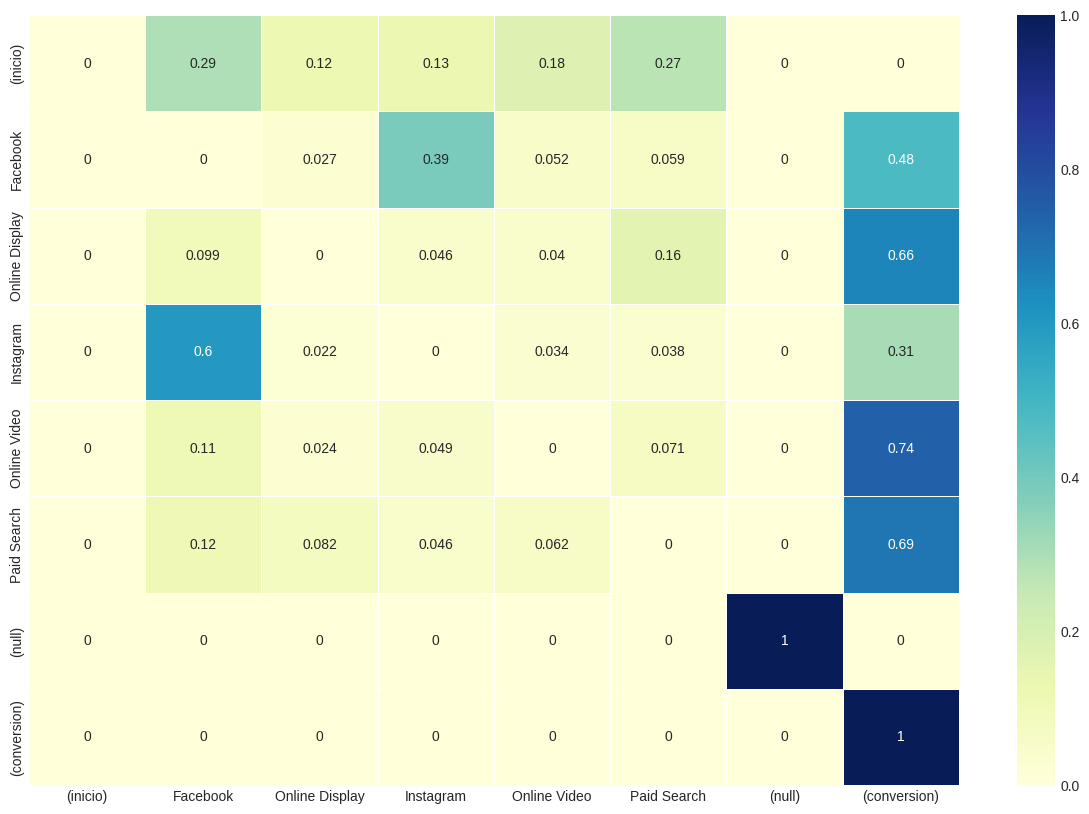

In [53]:
ax, fig = plt.subplots(figsize=(15,10))
sns.heatmap(attribution_markov[2].round(3), cmap="YlGnBu", annot=True, linewidths=.5)

<Axes: >

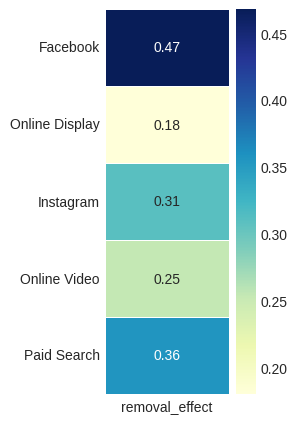

In [54]:
ax, fig = plt.subplots(figsize=(2,5))
sns.heatmap(attribution_markov[3].round(3), cmap="YlGnBu", annot=True, linewidths=.5)

**Shapley model**

In [55]:
attributions.attribution_shapley(size=5, order=True, values_col='conv_rate')[0]

,combinations,conversions,total_sequences,conversion_value,conv_rate,attribution_shapley_size5_conv_rate_order_algorithmic
0,Facebook,3001,46569,3001,0.064442,[3001.0]
1,Facebook > Instagram,1345,11815,1345,0.113838,"[689.260574018785, 655.739425981215]"
2,Facebook > Instagram > Online Display,36,328,36,0.109756,"[15.638140820685049, 13.674939296057662, 6.686..."
3,Facebook > Instagram > Online Display > Online...,2,11,2,0.181818,"[0.34601841222581003, 0.7074742449668251, 0.29..."
5,Facebook > Instagram > Online Display > Paid S...,8,38,8,0.210526,"[1.658564816642676, 2.652298842291059, 1.70325..."
...,...,...,...,...,...,...
246,Paid Search > Online Video > Facebook,14,150,14,0.093333,"[2.506785170231544, 7.304937187189471, 4.18827..."
247,Paid Search > Online Video > Facebook > Instagram,1,29,1,0.034483,"[-0.6617846791203474, 0.7278240712558248, 0.69..."
251,Paid Search > Online Video > Instagram,2,44,2,0.045455,"[-0.2567185449575165, 1.7291745155532094, 0.52..."
252,Paid Search > Online Video > Instagram > Facebook,1,18,1,0.055556,"[-0.2476407248396557, 0.48621444942568026, 0.2..."


In [56]:
attributions.group_by_channels_models

,channels,attribution_markov_algorithmic,attribution_shapley_size5_conv_rate_order_algorithmic
0,Facebook,5259.510644,4999.913205
1,Online Display,2029.079076,2074.770885
2,Instagram,3487.241435,2615.248508
3,Online Video,2855.249482,3364.516306
4,Paid Search,4007.919363,4584.551096


**First click**

In [57]:
attribution_first_click = attributions.attribution_first_click()

In [58]:
attribution_first_click[0]

0               [0, 0, 0, 0]
1         [0, 0, 0, 0, 0, 0]
2            [0, 0, 0, 0, 0]
3                        [0]
4                        [0]
                 ...        
240103                   [0]
240104                   [0]
240105             [0, 0, 0]
240106                [0, 0]
240107                   [0]
Length: 240108, dtype: object

In [59]:
attribution_first_click[1]

,channels,attribution_first_click_heuristic
0,Facebook,5177
1,Instagram,2329
2,Online Display,2160
3,Online Video,3216
4,Paid Search,4757


**Last click**

In [60]:
attributions.attribution_last_click_non(but_not_this_channel='Direct')[1]

,channels,attribution_last_click_non_Direct_heuristic
0,Facebook,5301
1,Instagram,2244
2,Online Display,2139
3,Online Video,3408
4,Paid Search,4547


**Time decay**

In [61]:
attributions.attribution_time_decay(
    decay_over_time=0.6,
    frequency=7)[1]

,channels,attribution_time_decay0.6_freq7_heuristic
0,Facebook,5290.510526
1,Instagram,2264.067983
2,Online Display,2134.889793
3,Online Video,3410.684073
4,Paid Search,4538.847626


**Plotting all the models in bar-chart for comparison**

<Axes: xlabel='channels', ylabel='value'>

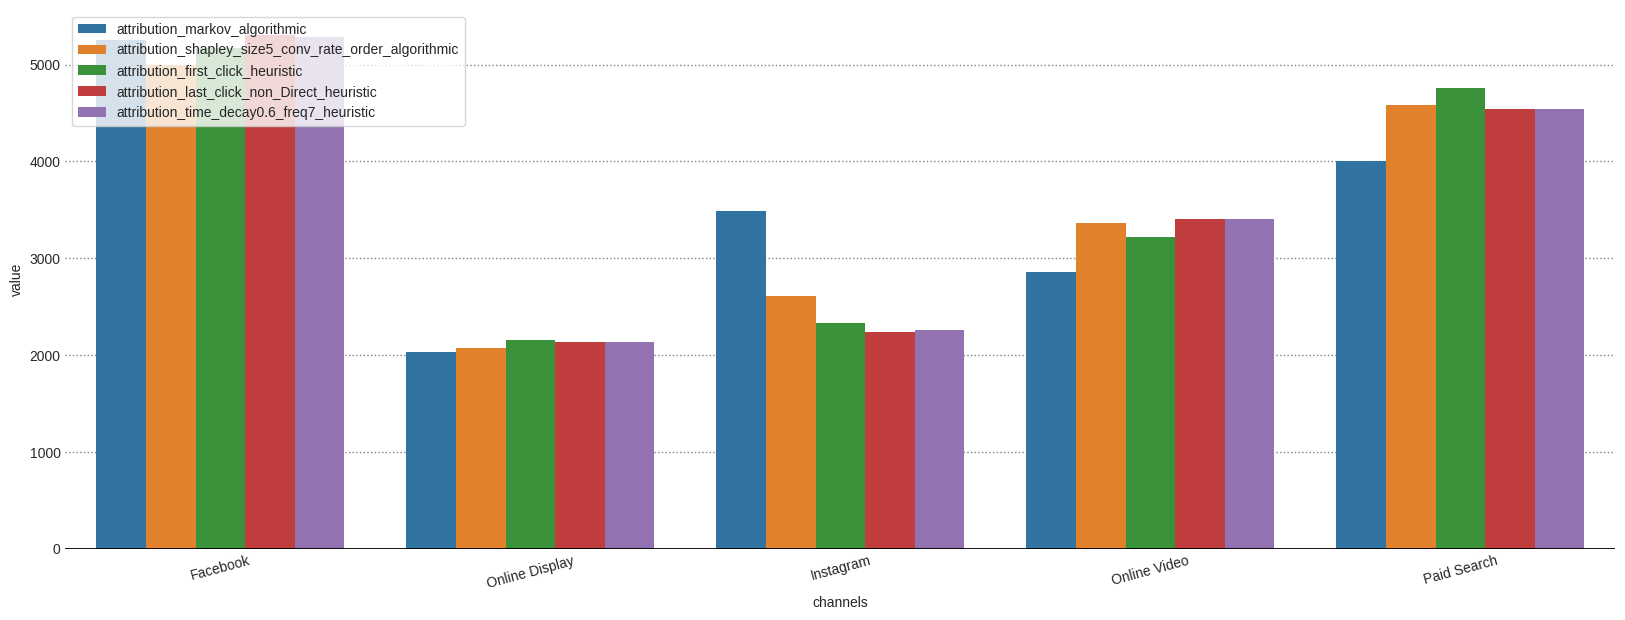

In [62]:
attributions.plot()

**Plotting only algorithmic bar-plots for the more clarification on contrast results in between online video and Instagram** 

<Axes: xlabel='channels', ylabel='value'>

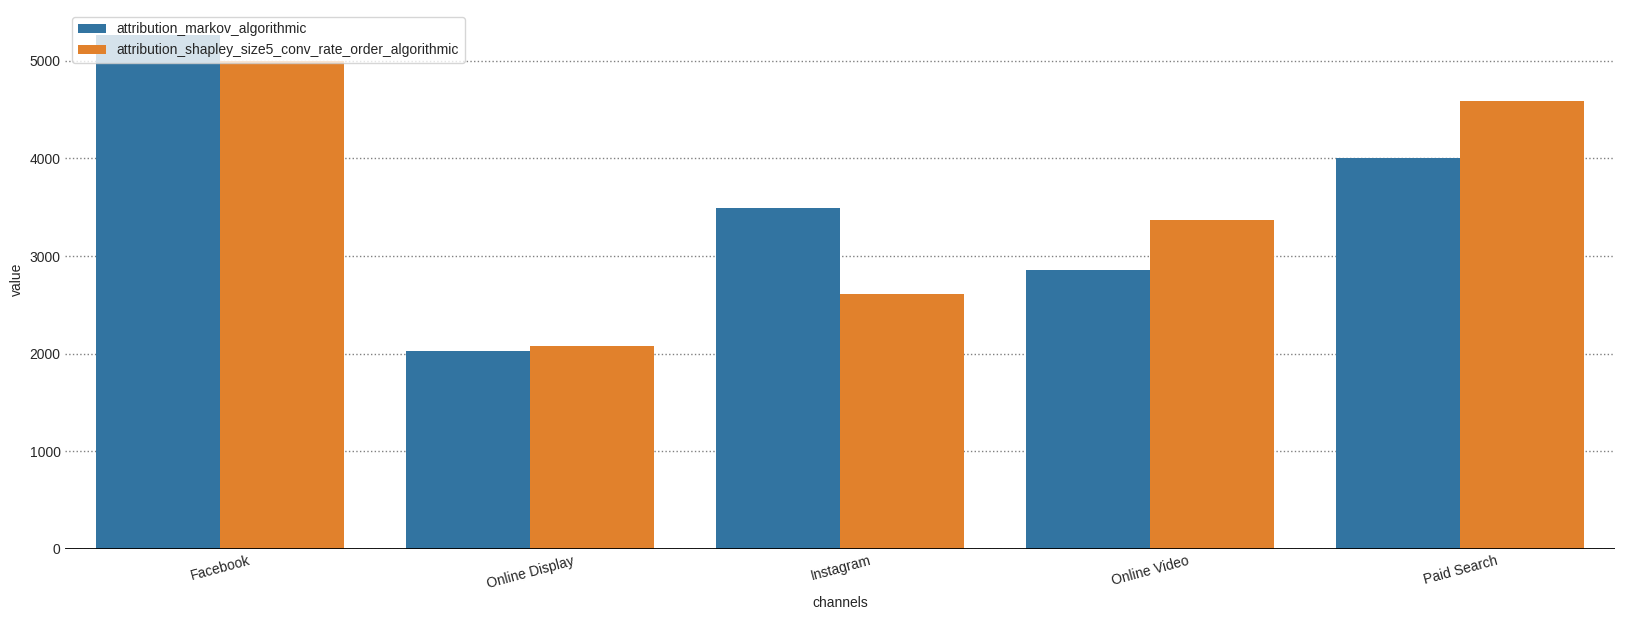

In [63]:
attributions.plot(model_type='algorithmic')